# Sine Wave using RNN (TensorFlow)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [3]:
x = np.linspace(0, 50, 501) # create 500 linearly spaced out points 

In [4]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [5]:
y = np.sin(x) # Numpy to create a simple sine wave

In [6]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

## Visulaization

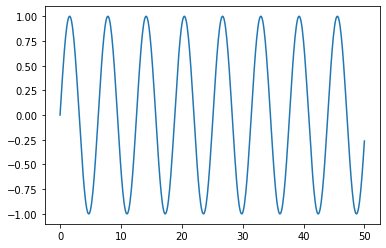

In [7]:
plt.plot(x, y);

## Dataframe 

In [8]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])

In [9]:
df.head()

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


-----

## Train Test Split

In [10]:
len(df) #length

501

In [37]:
# pecentage of test data (# 10%)
test_percent = 0.1 

In [13]:
# 50 data points needed for the testing data
len(df) * test_percent

50.1

In [38]:
test_point = np.round(len(df) * test_percent)
test_point

50.0

In [39]:
test_index_start = int(len(df) - test_point)  # Index of testing data start
test_index_start

451

In [40]:
train = df.iloc[:test_index_start]   #train Data
test = df.iloc[test_index_start:]    #test Data

In [41]:
train

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [42]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


-------

## Scale Data


In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()

In [45]:
scaled_train = scaler.fit_transform(train) 
scaled_test = scaler.transform(test)

In [48]:
scaled_train

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


In [49]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


## Time Series Generator


In [25]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [71]:
length = 2          # Length of the output sequences Length (timesteps)
batch_size = 1      # timeseries samples in each batch

# data and targets are same value)

generator = TimeseriesGenerator(data=scaled_train, targets=scaled_train,
                                                   length=length, batch_size=batch_size)    # generator


generator

In [82]:
len(scaled_train)

451

In [72]:
len(generator) # n_input = 2

449

In [73]:
X, y = generator[0]

In [74]:

X

array([[[0.49999912],
        [0.54991622]]])

In [75]:
y

array([[0.59933458]])

for 2 values in `X`, we are predicting the third number `y`

In [76]:
scaled_train[:7]

array([[0.49999912],
       [0.54991622],
       [0.59933458],
       [0.64776041],
       [0.69470985],
       [0.73971381],
       [0.78232262]])

In [77]:
# 5 generators
for i in range(5):
  X, y = generator[i]
  print("X = ", X, "\n")
  print("y = ", y, "\n")

X =  [[[0.49999912]
  [0.54991622]]] 

y =  [[0.59933458]] 

X =  [[[0.54991622]
  [0.59933458]]] 

y =  [[0.64776041]] 

X =  [[[0.59933458]
  [0.64776041]]] 

y =  [[0.69470985]] 

X =  [[[0.64776041]
  [0.69470985]]] 

y =  [[0.73971381]] 

X =  [[[0.69470985]
  [0.73971381]]] 

y =  [[0.78232262]] 



In [89]:
# changing parameters
length = 4
batch_size = 1

generator = TimeseriesGenerator(data=scaled_train, targets=scaled_train,
                                                   length= length, batch_size=batch_size)

In [90]:
len(scaled_train), len(generator) # for 4 values in X,  predict the third number y

(451, 447)

In [93]:
# changing parameters
length = 4
batch_size = 2

generator = TimeseriesGenerator(data=scaled_train, targets=scaled_train,
                                                   length= length, batch_size=batch_size)

In [96]:
# with batch size of two, 

len(scaled_train), len(generator)  # 1 predictions(y) for each length of 4 

(451, 224)

In [97]:
X, y = generator[0]

In [113]:
np.shape(X) , np.shape(y) 

((2, 4, 1), (2, 1))

first four points, predict the fifth
 
for next four point(leaving only first point), predict the sixth point

In [112]:
X

array([[[0.49999912],
        [0.54991622],
        [0.59933458],
        [0.64776041]],

       [[0.54991622],
        [0.59933458],
        [0.64776041],
        [0.69470985]]])

In [108]:
y

array([[0.69470985],
       [0.73971381]])

In [102]:
scaled_train

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


#### What should be the length value?

1.   choose reasonable value for length, so that neural network can pick up patterns like any seasonality, or repeated effects.

2.   Our data is in sine wave.So neural network shoul pick up the pattern.

3.  Larger the data, the longer to train.



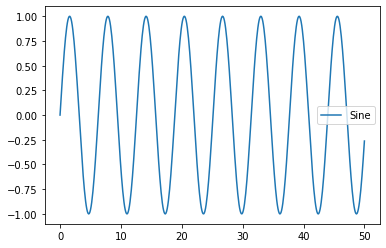

In [125]:
df.plot()

In [130]:
length = 50                    # taking length = 50
batch_size = 1

generator = TimeseriesGenerator(data=scaled_train, targets=scaled_train,
                                                   length= length, batch_size=batch_size)

In [131]:
len(df), len(generator)


(501, 401)

In [132]:
X, y = generator[0]

In [133]:
X

array([[[4.99999116e-01],
        [5.49916225e-01],
        [5.99334579e-01],
        [6.47760405e-01],
        [6.94709850e-01],
        [7.39713809e-01],
        [7.82322618e-01],
        [8.22110545e-01],
        [8.58680040e-01],
        [8.91665714e-01],
        [9.20737985e-01],
        [9.45606372e-01],
        [9.66022399e-01],
        [9.81782075e-01],
        [9.92727935e-01],
        [9.98750612e-01],
        [9.99789928e-01],
        [9.95835500e-01],
        [9.86926839e-01],
        [9.73152957e-01],
        [9.54651478e-01],
        [9.31607263e-01],
        [9.04250562e-01],
        [8.72854714e-01],
        [8.37733417e-01],
        [7.99237589e-01],
        [7.57751870e-01],
        [7.13690771e-01],
        [6.67494535e-01],
        [6.19624741e-01],
        [5.70559686e-01],
        [5.20789614e-01],
        [4.70811810e-01],
        [4.21125636e-01],
        [3.72227539e-01],
        [3.24606094e-01],
        [2.78737119e-01],
        [2.35078919e-01],
        [1.9

In [134]:
y

array([[0.02053313]])

## Create a model

In [135]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [136]:
n_features = 1     # predicting 1 feature


model = Sequential()          # define model


model.add(SimpleRNN(units=50, input_shape=(length, n_features)))       # Simple RNN layer


model.add(Dense(1))   # Final Prediction layer

model.compile(optimizer='adam', loss='mse')   #model complie  

In [137]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [138]:
model.fit(generator, epochs=5, verbose=1)            # fit model using generator

Epoch 1/5
401/401 [==============================] - 4s 8ms/step - loss: 0.0113
Epoch 2/5
401/401 [==============================] - 3s 9ms/step - loss: 5.7334e-04
Epoch 3/5
401/401 [==============================] - 4s 9ms/step - loss: 9.0500e-05
Epoch 4/5
401/401 [==============================] - 3s 8ms/step - loss: 2.9700e-05
Epoch 5/5
401/401 [==============================] - 3s 8ms/step - loss: 5.8932e-05


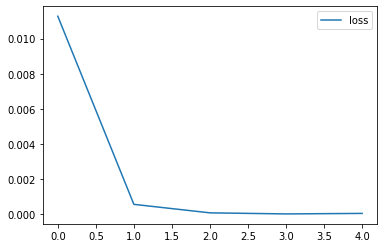

In [139]:
losses = pd.DataFrame(model.history.history)
losses.plot();     # Visualize the losses

## Evaluate the model


In [140]:
length

50

In [141]:
first_evaluation_batch = scaled_train[-length: ] # get the tail 50 data points that we leave before fitting the model

In [142]:
first_evaluation_batch[:5]

array([[0.83740582],
       [0.7988817 ],
       [0.75737124],
       [0.7132892 ],
       [0.66707605]])

In [143]:
first_evaluation_batch = first_evaluation_batch.reshape((1, length, n_features)) # 1 is we want to predict one sample only

In [144]:
first_evaluation_batch

array([[[8.37405820e-01],
        [7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.5

### Predict

In [145]:
model.predict(first_evaluation_batch)

array([[0.9384902]], dtype=float32)

In [ ]:
scaled_test[0] #get the first data point from test set

array([0.94955134])

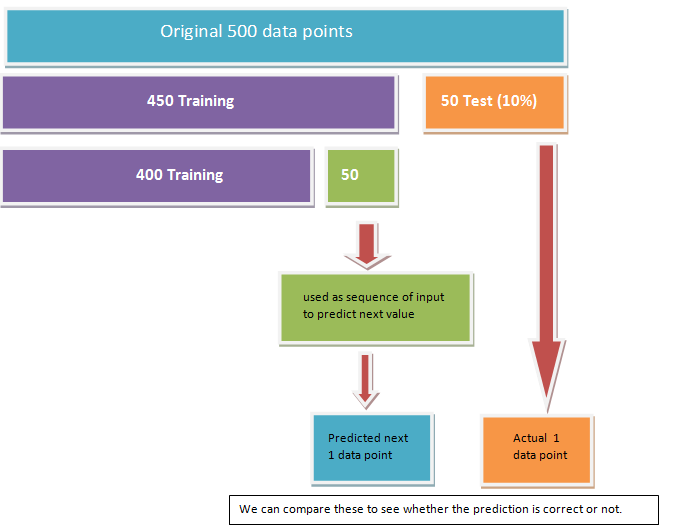

In [149]:
#predict the entire test range.

test_predictions = []

first_evaluation_batch = scaled_train[-length: ]     #2D shape

# predict 1 sample data point, using a input sequences of 50 data points, with 1 feature.
current_batch = first_evaluation_batch.reshape(1, length, n_features)      #3D shape

In [147]:
first_evaluation_batch

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [148]:
current_batch

array([[[8.37405820e-01],
        [7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.5

 So basically, we need to loop the process of 
+  removing first data point, 
+  appending new data point to the end to `current_batch`.

In [ ]:
current_batch[0][0]

array([0.83740582])

+  get everythings from first dimension
+  in second dimension , skip the item at zero index (skipping the first data point as we are now sliding or stepping one step at a time) and get the data till the end. 
+  get everything from third dimension

In [ ]:
current_batch[:, 1:, :]

array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

### Dropping and Appending

+ if we compare the demo of current_batch first data point with first data point of first_evaluation_batch,
`first_evaluation_batch`: 8.37405820e-01
`current_batch`: 7.98881698e-01
+ we see that first data point of `current batch` has been shifted to next one and newly predicted value 99 is added to the end.

In [150]:
predicted_value = [[[99]]] # let say we predicted value of 99
predicted_value

[[[99]]]

In [ ]:
np.append(current_batch[:, 1:, :], predicted_value, axis=1)

array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

In [ ]:
first_evaluation_batch

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


### Acutal loop for the process

In [151]:
test_predictions = [] # for predictions

first_evaluation_batch = scaled_train[-length: ]

# predict 1 sample data point, using a input sequences of 50 data points, with 1 feature.
current_batch = first_evaluation_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_prediction = model.predict(current_batch)[0] 
   
    test_predictions.append(current_prediction)
    
     # drop first data point, append newly predicted value at the end and reasign back
    current_batch = np.append(current_batch[:, 1:, :], [[current_prediction]], axis=1)

### This is predictions

In [152]:
test_predictions[:5]

[array([0.9384902], dtype=float32),
 array([0.95978695], dtype=float32),
 array([0.9689485], dtype=float32),
 array([0.98011845], dtype=float32),
 array([0.981145], dtype=float32)]

In [153]:
scaled_test[:5]

array([[0.94955134],
       [0.96915662],
       [0.98407422],
       [0.99415511],
       [0.99929856]])

# Inverse Transformations and Compare

As our predictions was in scaled version, we need to transform it to original form.

In [154]:
true_predictions = scaler.inverse_transform(test_predictions)

In [155]:
true_predictions[:5]

array([[0.87697515],
       [0.91956829],
       [0.93789121],
       [0.96023097],
       [0.96228409]])

In [156]:
test.head()

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591


In [157]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [158]:
test.head()

,Sine,Predictions
45.1,0.899097,0.876975
45.2,0.938307,0.919568
45.3,0.968142,0.937891
45.4,0.988304,0.960231
45.5,0.998591,0.962284


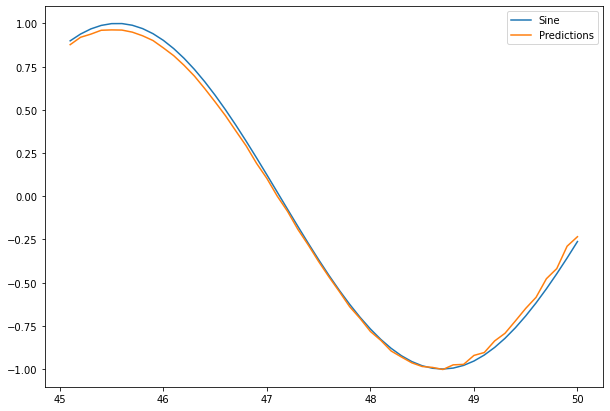

In [160]:
test.plot(figsize=(10,7));

## Early Stopping and Validation Generator

### Two generator: one for training and one for testing

In [164]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',
                                                patience=2)

NOTE: As `length` needs to at least 1 size shorter than length of passed data, we need to redefine `length` and `Training Generator.`

In [165]:
length = 49


generator = TimeseriesGenerator(data=scaled_train, targets=scaled_train,
                                                    length=length, batch_size=1)

validation_generator = TimeseriesGenerator(data=scaled_test, targets=scaled_test,
                                                                      length=length, batch_size=1)

## Creating Model with LSTM

In [166]:
model = Sequential()

model.add(LSTM(50, input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [168]:
model.fit(generator, epochs=20, 
             validation_data=validation_generator,
             callbacks=[early_stopping],
             verbose=1)

Epoch 1/20
402/402 [==============================] - 8s 20ms/step - loss: 6.9723e-05 - val_loss: 1.2848e-05
Epoch 2/20
402/402 [==============================] - 8s 20ms/step - loss: 0.0016 - val_loss: 7.2086e-04
Epoch 3/20
402/402 [==============================] - 8s 20ms/step - loss: 5.4791e-04 - val_loss: 3.7005e-06
Epoch 4/20
402/402 [==============================] - 9s 21ms/step - loss: 3.3070e-05 - val_loss: 2.0446e-05
Epoch 5/20
402/402 [==============================] - 8s 21ms/step - loss: 2.7412e-05 - val_loss: 2.1957e-06
Epoch 6/20
402/402 [==============================] - 8s 19ms/step - loss: 1.2633e-05 - val_loss: 5.4654e-06
Epoch 7/20
402/402 [==============================] - 8s 20ms/step - loss: 2.4033e-05 - val_loss: 2.2231e-06


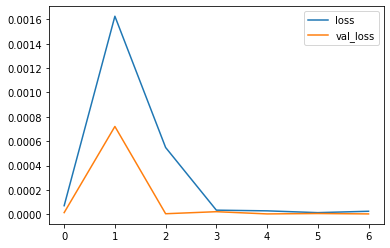

In [169]:
losses = pd.DataFrame(model.history.history)

losses.plot();

## Predictions and Evaluation

In [170]:
test_predictions = []

first_evaluation_batch = scaled_train[-length:]

current_batch = first_evaluation_batch.reshape(1, length, n_features)

for i in range(len(test)):
    current_prediction = model.predict(current_batch)[0]
    
    test_predictions.append(current_prediction)
    
    current_batch = np.append(current_batch[:, 1:, :], [[current_prediction]], axis=1)

## Inverse Transformation and Compare

In [171]:
true_predictions = scaler.inverse_transform(test_predictions)

test['LSTM Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [172]:
test.head()

,Sine,Predictions,LSTM Predictions
45.1,0.899097,0.876975,0.901144
45.2,0.938307,0.919568,0.939948
45.3,0.968142,0.937891,0.969225
45.4,0.988304,0.960231,0.988694
45.5,0.998591,0.962284,0.998188


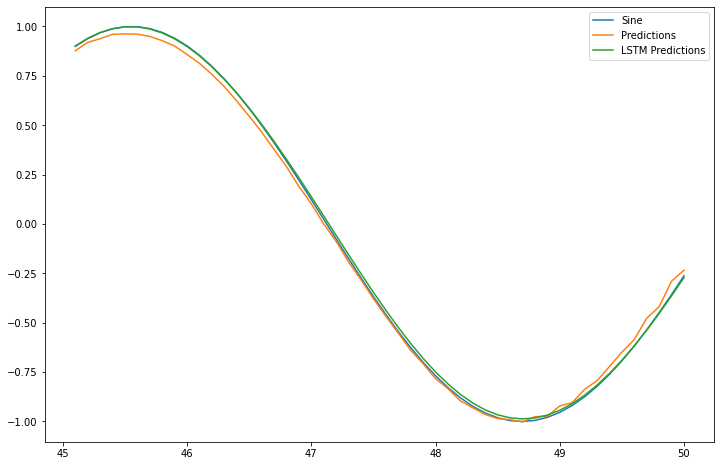

In [173]:
test.plot(figsize=(12,8));

## Forecasting


In [178]:
# scale the full data set

scaled_full_data = MinMaxScaler().fit_transform(df)

In [179]:
# generator
length = 50

generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [180]:
# create model
model = Sequential()

model.add(LSTM(50, input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [181]:
# fit the model
model.fit(generator, 
              epochs=6,
              verbose=1)

Epoch 1/6
451/451 [==============================] - 11s 20ms/step - loss: 0.0091
Epoch 2/6
451/451 [==============================] - 9s 20ms/step - loss: 7.8954e-05
Epoch 3/6
451/451 [==============================] - 9s 20ms/step - loss: 2.1853e-04
Epoch 4/6
451/451 [==============================] - 10s 21ms/step - loss: 5.1341e-04
Epoch 5/6
451/451 [==============================] - 9s 21ms/step - loss: 4.9083e-05
Epoch 6/6
451/451 [==============================] - 9s 20ms/step - loss: 6.1248e-05


In [182]:
# make forecast into the future
forecast = []

first_evaluation_batch = scaled_full_data[-length: ]
current_batch = first_evaluation_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_prediction = model.predict(current_batch)[0]
    
    forecast.append(current_prediction)
    
    current_batch = np.append(current_batch[:, 1: , :], [[current_prediction]], axis=1)

In [183]:
# inverse transform the forecast values
true_forecast = MinMaxScaler().inverse_transform(forecast)

In [184]:
df.tail()

,Sine
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400
50.0,-0.262375


Data Frame index ends at `50.0`. 

for adding our forecast to original df, we have to pass indexes and values.

In [185]:
50 * 0.1 # 0.1 is the step size for indexes

5.0

In [187]:
50.1 + 5.0 # ending index

55.1

In [188]:
forecast_index = np.arange(50.1, 55.1, step=0.1)

In [189]:
len(forecast_index), len(forecast) # make sure both has same length

(50, 50)

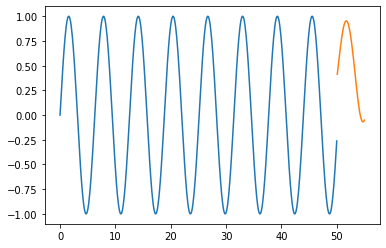

In [190]:
plt.plot(df.index, df['Sine'])
plt.plot(forecast_index, forecast);